# Linear Regression Project
This model predicts the correlation between characteristics of the person exercising (duration, body temperature, gender, age, height, weight, heart rate) with calories burned.

# Importing libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for splitting dataset
from sklearn.model_selection import train_test_split

# for feature selection
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# training of model and prediction
from sklearn.linear_model import LinearRegression



# Uploading the calories and exercise datasets
* About the calories dataset: The amount of calories burned in 15000 people was collected.

* About the exercise dataset: The dataset contains characteristics such as gender, age, height, weight, duration, heart rate and body temperature, to find out the correlation between exercise and calories burned.


In [2]:
calories = pd.read_csv('calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
exercise = pd.read_csv('exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


## Combining the datasets

In [4]:
calories_burnt = pd.concat([exercise, calories["Calories"]], axis = 1)
calories_burnt.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## Data preprocessing

In [5]:
calories_burnt.info() # we have 15000 people and 9 characteristics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


### Information
* 2 columns have integer type values
* 1 column has a string
* 6 columns have float type values

In [6]:
calories_burnt.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## Dummy variables
Transforming categorical variables into numerical. We apply this to the "Gender" column.


In [7]:
dummy_gender = pd.get_dummies(calories_burnt["Gender"]).iloc[:,1:] # obtaining dummy variables
columns_names = calories_burnt.columns.values.tolist()
calories_burnt = calories_burnt[columns_names].join(dummy_gender)
calories_burnt.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,male
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,0


## Data Visualization

In [9]:
sns.set()

### Gender

In [10]:
# Number of men in the dataset
print("There are " + str(np.sum(calories_burnt["male"])) + " men in the dataset")
print("There are " + str(len(calories_burnt)-np.sum(calories_burnt["male"])) + " women in the dataset")

There are 7447 men in the dataset
There are 7553 women in the dataset


<AxesSubplot: xlabel='male', ylabel='count'>

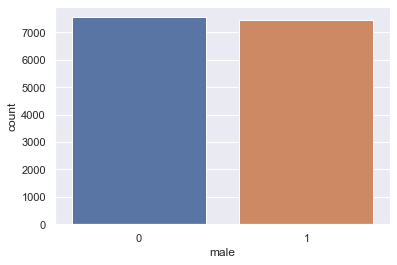

In [30]:
sns.countplot(data = calories_burnt, x = "male") # 1: male, 2: female

### Age

The majority of people are between 20 and 30 years old. The peak is reached at the age of 20 year and as age increases, the number of people decreases.

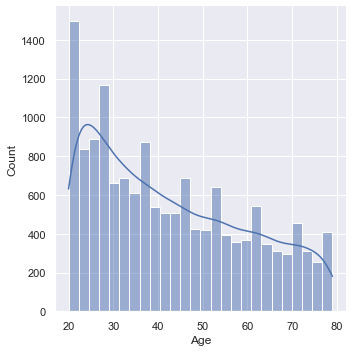

In [11]:
sns.displot(calories_burnt["Age"], kde = True)

### Height

In [12]:
print("The maximum height in the dataset is " + str(max(calories_burnt["Height"]))) # obtaining the maximum height

The maximum height in the dataset is 222.0


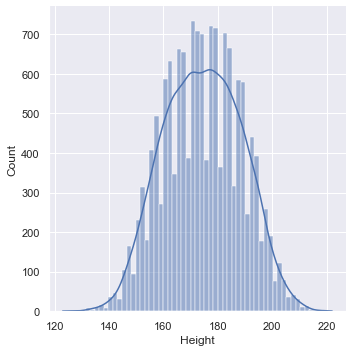

In [13]:
sns.displot(calories_burnt["Height"], kde = True)

The maximum height si 222 cm. The distribution is Gaussian for this feature.

### Weight

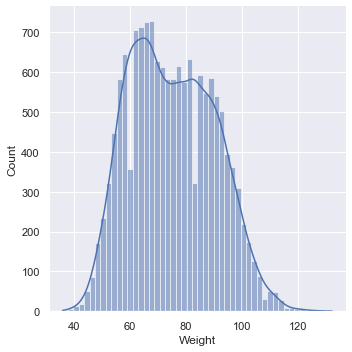

In [14]:
sns.displot(calories_burnt["Weight"], kde = True)

In [16]:
# Finding the peaks of the binomial distribution
count_50_75 = calories_burnt[(50 < calories_burnt["Weight"]) & (calories_burnt["Weight"] < 75)]["Weight"].value_counts()
first_weight_peak = count_50_75[count_50_75 == max(count_50_75)]
count_75_90 = calories_burnt[(75 < calories_burnt["Weight"]) & (calories_burnt["Weight"] < 90)]["Weight"].value_counts()
second_weight_peak = count_75_90[count_75_90 == max(count_75_90)]
first_weight_peak, second_weight_peak

(66.0    374
 Name: Weight, dtype: int64,
 82.0    331
 Name: Weight, dtype: int64)

The graph presents a binomial distribution, that is, it has two peaks. The first peak is located around 66 and the second is around 82.

### Duration

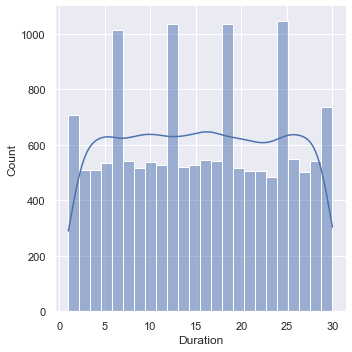

In [15]:
sns.displot(calories_burnt["Duration"], kde = True)

In [19]:
print("The duration has a mean of " + str(np.mean(calories_burnt["Duration"])))

The duration has a mean of 15.5306


### Heart Rate

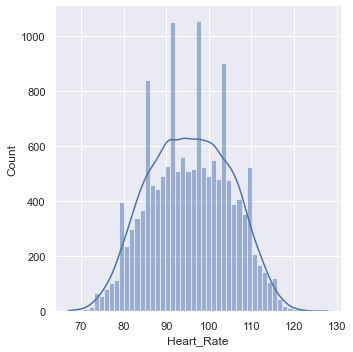

In [20]:
sns.displot(calories_burnt["Heart_Rate"], kde=True)

In [21]:
print("The mean of heart rate is {}".format(np.mean(calories_burnt["Heart_Rate"])))

The mean of heart rate is 95.51853333333334


We can observe that the heart rate column is normally distributed with mean of 95.52 heart beats and has several outliers.

### Body temp

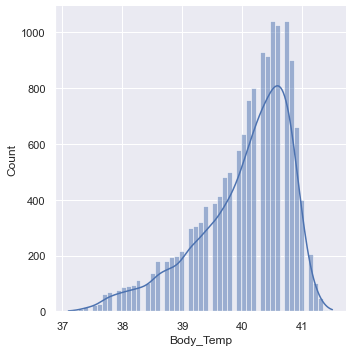

In [22]:
sns.displot(calories_burnt["Body_Temp"], kde = True)

In [23]:
print("The mean of body temperature is {}".format(np.mean(calories_burnt["Body_Temp"])))

The mean of body temperature is 40.02545333333334


We can observe thath the body temperature column is negatively skewed with mean of 40.02

### Correlation plot

C:\Users\Alanr\AppData\Local\Temp/ipykernel_13544/498027105.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = calories_burnt.corr()


<AxesSubplot: >

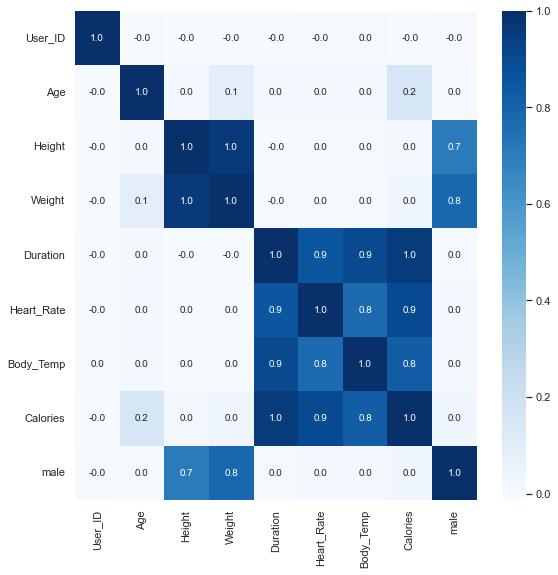

In [117]:
correlation = calories_burnt.corr()

plt.figure(figsize=(9,9))
sns.heatmap(correlation, cbar=True, fmt = '0.1f', annot=True, cmap = "Blues")

* Inference:

Here we can see that the duration is highly correlated with the calorie burning, therefore, it will be important for our model. Likewise, there is a correlation between heart_rate and body_temp with calories with both 0.9.

## Model Building and Training
Selection of predictor variables and target variable

In [24]:
X = calories_burnt.drop(["User_ID", "Calories", "Gender"], axis = 1)
Y = calories_burnt["Calories"]

In [26]:
X.head() # There are 7 variables to predict calories

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,male
0,68,190.0,94.0,29.0,105.0,40.8,1
1,20,166.0,60.0,14.0,94.0,40.3,0
2,69,179.0,79.0,5.0,88.0,38.7,1
3,34,179.0,71.0,13.0,100.0,40.5,0
4,27,154.0,58.0,10.0,81.0,39.8,0


### Dividing the dataset into training and test set.
We will set the test size to 0.2, so we will train 80% of dataset and we will test predictions on 20% of the data.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print("We have {} data in the set, {} for training and {} for testing".format(X.shape[0], X_train.shape[0], X_test.shape[0]))

We have 15000 data in the set, 12000 for training and 3000 for testing


Therefor:
* X contains the original 15000 data
* X_train contains 80% of the data (12000)
* X_test contains 20% of the data (3000)

### Creating and training the Linear Regression model 

In [29]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

#### Obtaining the indendent value and the slope for each predicto variable

In [30]:
# Obtaining the independent value and the slope
lm.intercept_, lm.coef_

(470.5093983922922,
 array([  0.4971492 ,  -0.19413313,   0.31333848,   6.64043789,
          1.98718175, -17.09094547,  -1.4198873 ]))

### Prediction of the data

In [31]:
calories_burnt_prediction = lm.predict(X_test)

In [32]:
print(calories_burnt_prediction)

[137.49241057 182.18166512  50.15864741 ... 157.56637167  16.54924422
 100.21047087]


### Calculating R2 

In [43]:
# for training data
print("R2 training data: {}%".format(lm.score(X_train, Y_train)*100))


R2 training data: 96.72762198112508%


In [42]:
# for testing data
print("R2 testing data: {}%".format(lm.score(X_test, Y_test)*100))

R2 testing data: 96.68790377181355%


### Calculating sum of squares error (SSE), residual Standard Error (RSE), and error

In [91]:
# for training data
SSE = np.sum((Y_train-lm.predict(X_train))**2)
RSE = np.sqrt(SSE/(len(X)-len(X_train.columns)-1))
calories_mean = np.mean(Y_train)
error = RSE/calories_mean
print("The Sum of Squares Error (SSE) is {},\nResidual Standard Error (RSE): {},\nError for training data: {:2.3f}%".format(SSE, RSE, error*100))

The Sum of Squares Error (SSE) is 1529056.9061041109,
Residual Standard Error (RSE): 10.099085233440798,
Error for training data: 11.273%


In [92]:
# for testing data
SSE = np.sum((Y_test-lm.predict(X_test))**2)
RSE = np.sqrt(SSE/(len(X)-len(X_test.columns)-1))
calories_mean = np.mean(Y_test)
error = RSE/calories_mean
print("The Sum of Squares Error (SSE) is {},\nResidual Standard Error (RSE): {},\nError for training data: {:2.3f}%".format(SSE, RSE, error*100))

The Sum of Squares Error (SSE) is 390261.22158565134,
Residual Standard Error (RSE): 5.102087624823799,
Error for training data: 5.710%


## Building a Predictive System:

This predictive system takes input features and gives us the amount of calories burned.

In [95]:
def prediction(data):
    '''
    Input data: [Age, Height, Weight, Duration, Heart_Rate, Body_Temp, Gender (Male: 1, Female: 0)]
    '''
    input_data = data
    X = np.asarray(input_data)
    Y_pred = lm.predict(X)
    print("The amount of Calories burned are: ", Y_pred)

prediction([68,190,94.0,29.0,105.0,40.8,0])


c:\Users\Alanr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 68.  190.   94.   29.  105.   40.8   0. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.